In [73]:
import pandas as pd
import numpy as np
import math
from numpy import nan
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
from numpy import fft
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams["figure.figsize"] = (20,10)

# Data Cleansing

fill_missing() replaces NaN values for the value of the previous day

In [55]:
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if np.isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]

In [56]:
power_consumption=pd.read_csv('C:\\Users\\Amin y Lubna\\Desktop\\Escritorio Virtual\\Carrera Amin\\1.TFG\\household_power_consumption.csv',sep=';',low_memory=False,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])
power_consumption=power_consumption[['Global_active_power']]
power_consumption.replace('?', nan, inplace=True)
power_consumption['Global_active_power'] = power_consumption['Global_active_power'].astype(float)
fill_missing(power_consumption.values)
power_consumption['Global_active_power'] = power_consumption['Global_active_power'].apply(lambda x: x/60)
power_consumption=power_consumption.resample('h').sum()
power_consumption.rename(columns={"Global_active_power":"Active_Energy"},inplace=True)

# EDA

<AxesSubplot:xlabel='datetime', ylabel='Active_Energy'>

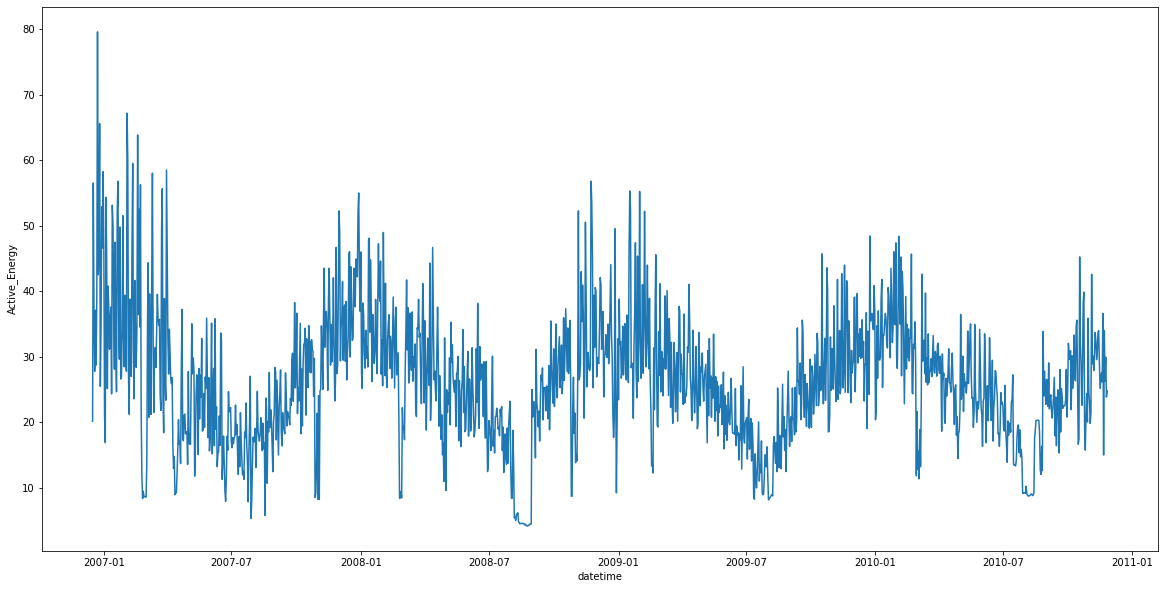

In [69]:
df_by_day=power_consumption.resample('D').sum()
sns.lineplot(x=df_by_day.index,y='Active_Energy',data=df_by_day)

<AxesSubplot:xlabel='datetime', ylabel='Active_Energy'>

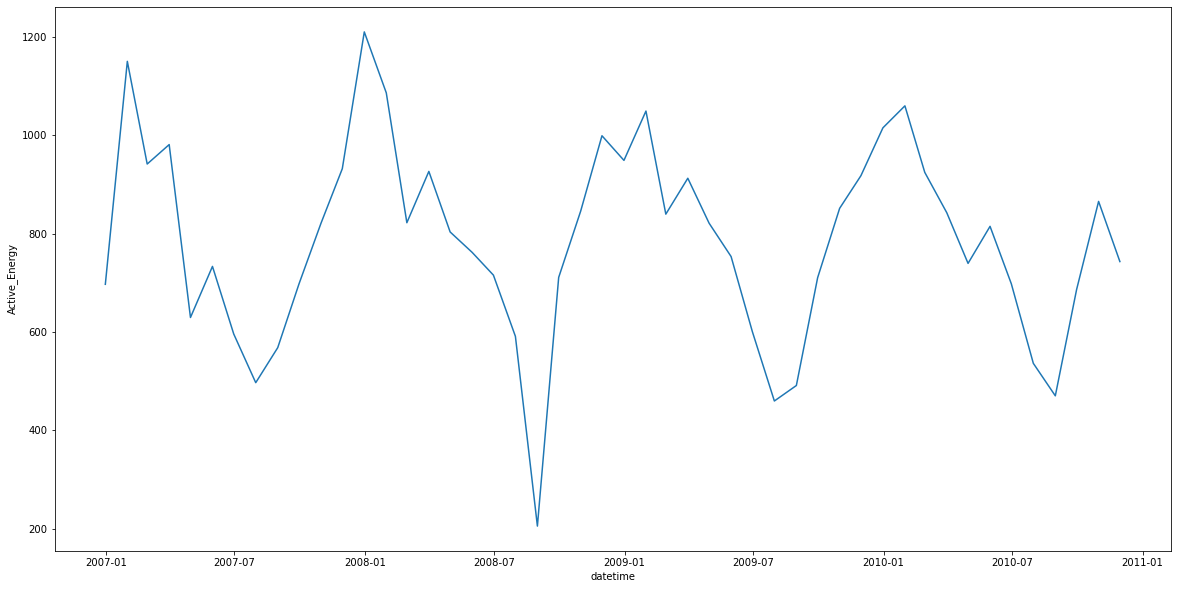

In [70]:
df_by_day=power_consumption.resample('M').sum()
sns.lineplot(x=df_by_day.index,y='Active_Energy',data=df_by_day)

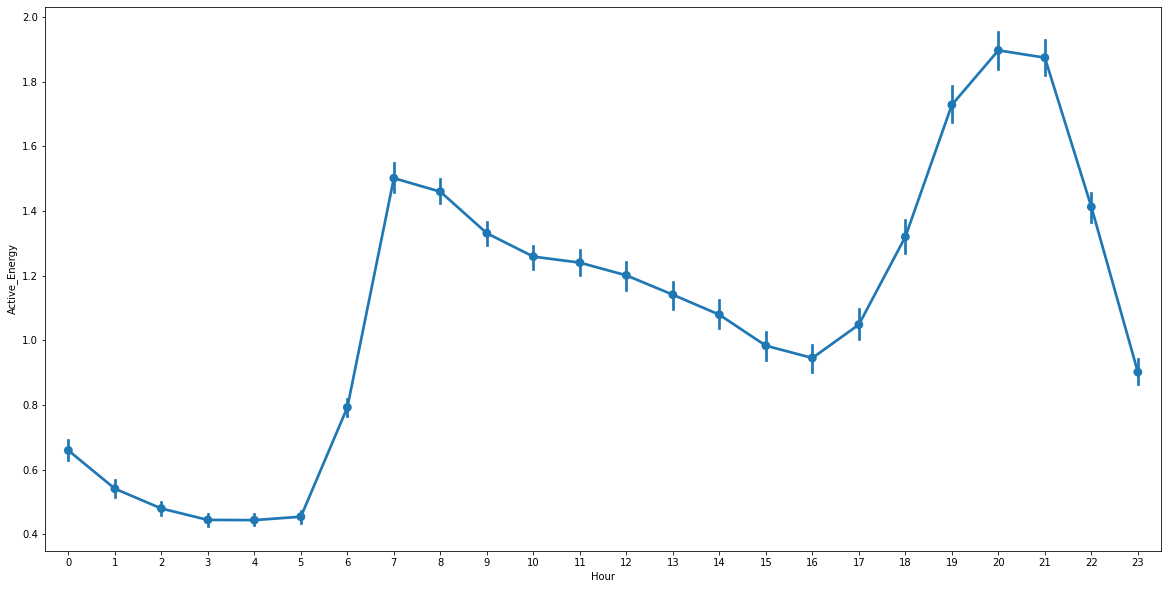

In [71]:
plot_for_power_consumption=power_consumption
plot_for_power_consumption['Hour']=plot_for_power_consumption.index.hour
plot_for_power_consumption['Month']=plot_for_power_consumption.index.month
sns.pointplot(data=plot_for_power_consumption,x='Hour',y='Active_Energy')

<AxesSubplot:xlabel='Month', ylabel='Active_Energy'>

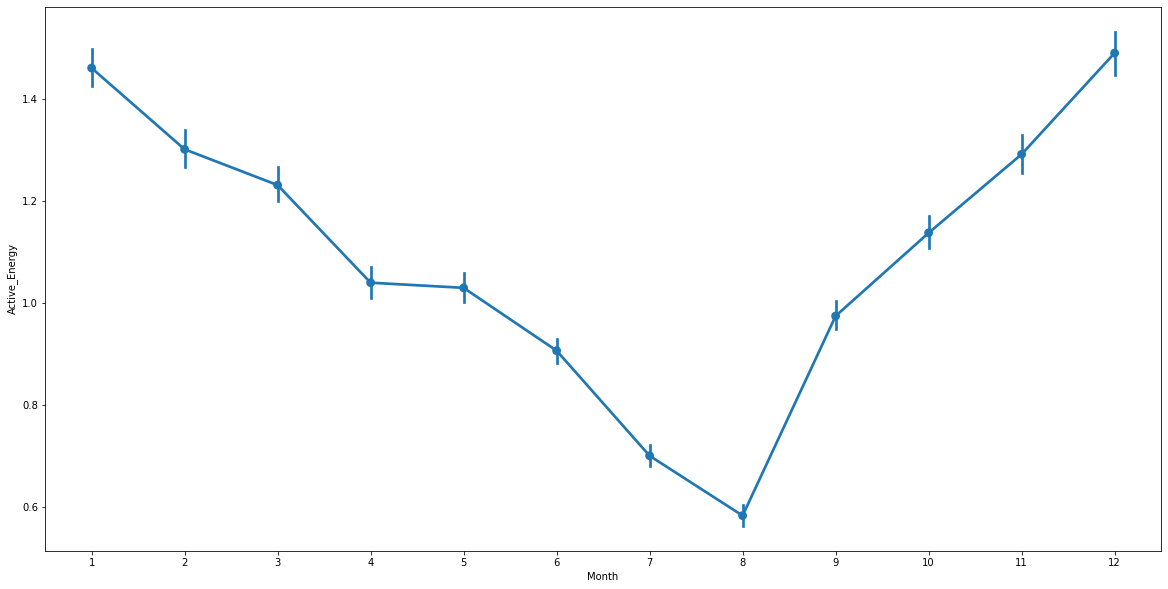

In [72]:
sns.pointplot(data=plot_for_power_consumption,x='Month',y='Active_Energy')

# Time Series Decomposition

<ipython-input-57-b68cf2ef66fb>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  a_decomposition = seasonal_decompose(power_consumption['Active_Energy'], model='additive',freq=8760, extrapolate_trend='freq')


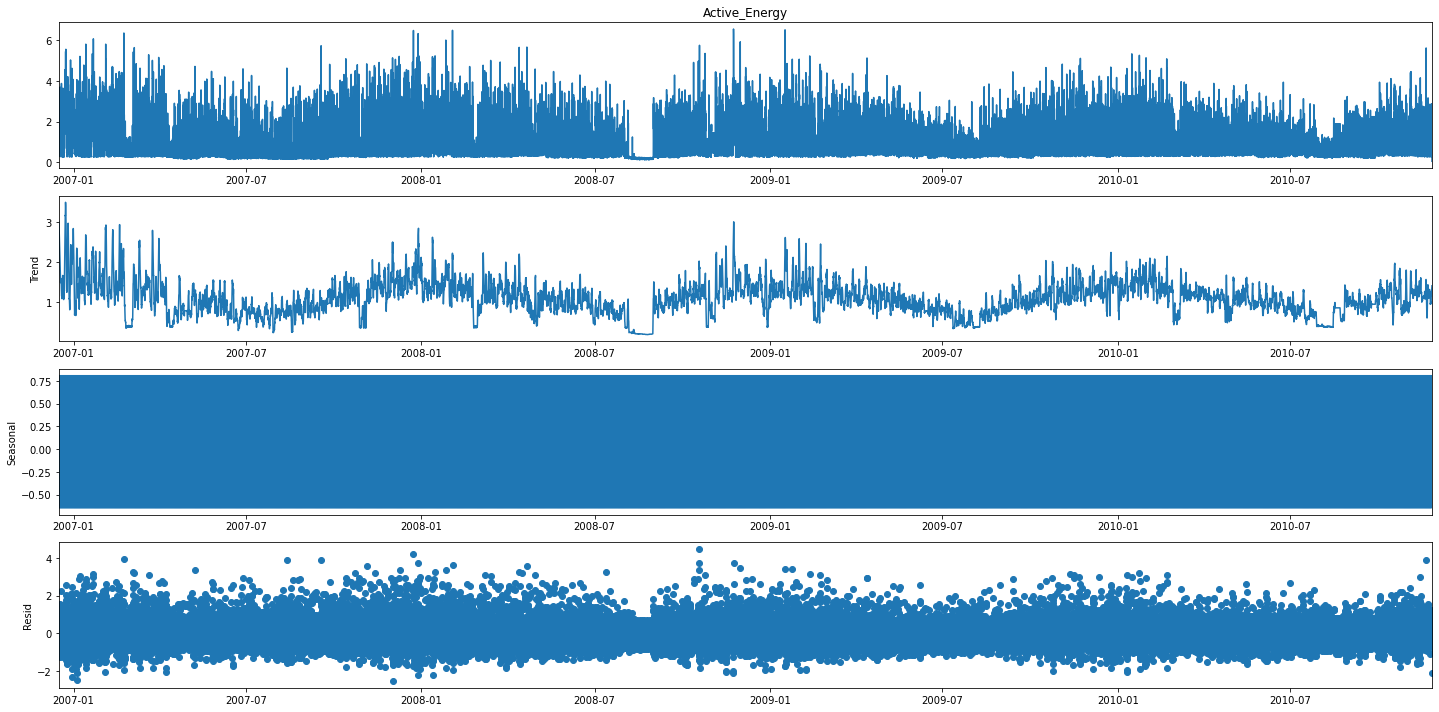

In [57]:
a_decomposition = seasonal_decompose(power_consumption['Active_Energy'], model='additive',freq=8760, extrapolate_trend='freq')
decomposition.plot()
pyplot.show()

<ipython-input-58-e7a4d40310f3>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  m_decomposition = seasonal_decompose(power_consumption['Active_Energy'], model='multiplicative',freq=8760, extrapolate_trend='freq')


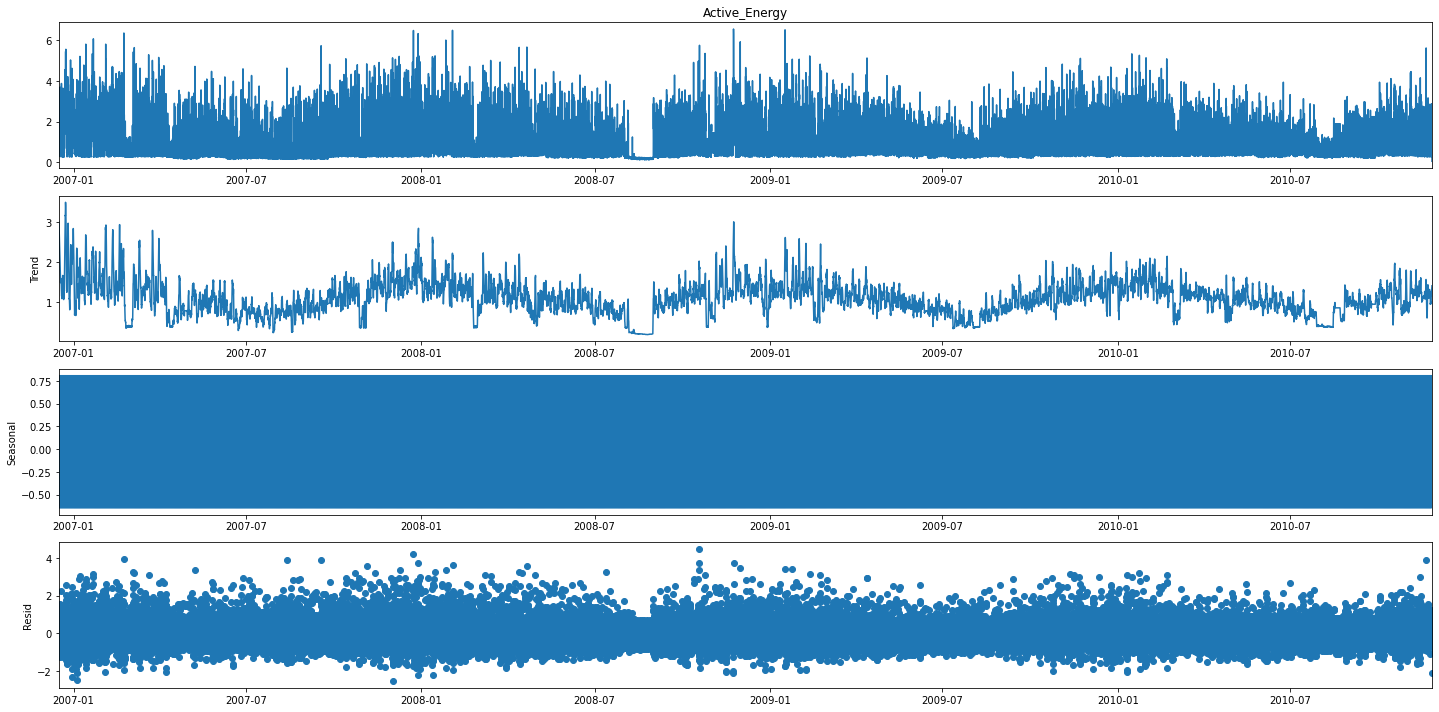

In [58]:
m_decomposition = seasonal_decompose(power_consumption['Active_Energy'], model='multiplicative',freq=8760, extrapolate_trend='freq')
decomposition.plot()
pyplot.show()


<ipython-input-59-5cb15b96104d>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  a_decomposition = seasonal_decompose(power_consumption['Active_Energy'], model='additive',freq=24, extrapolate_trend='freq')


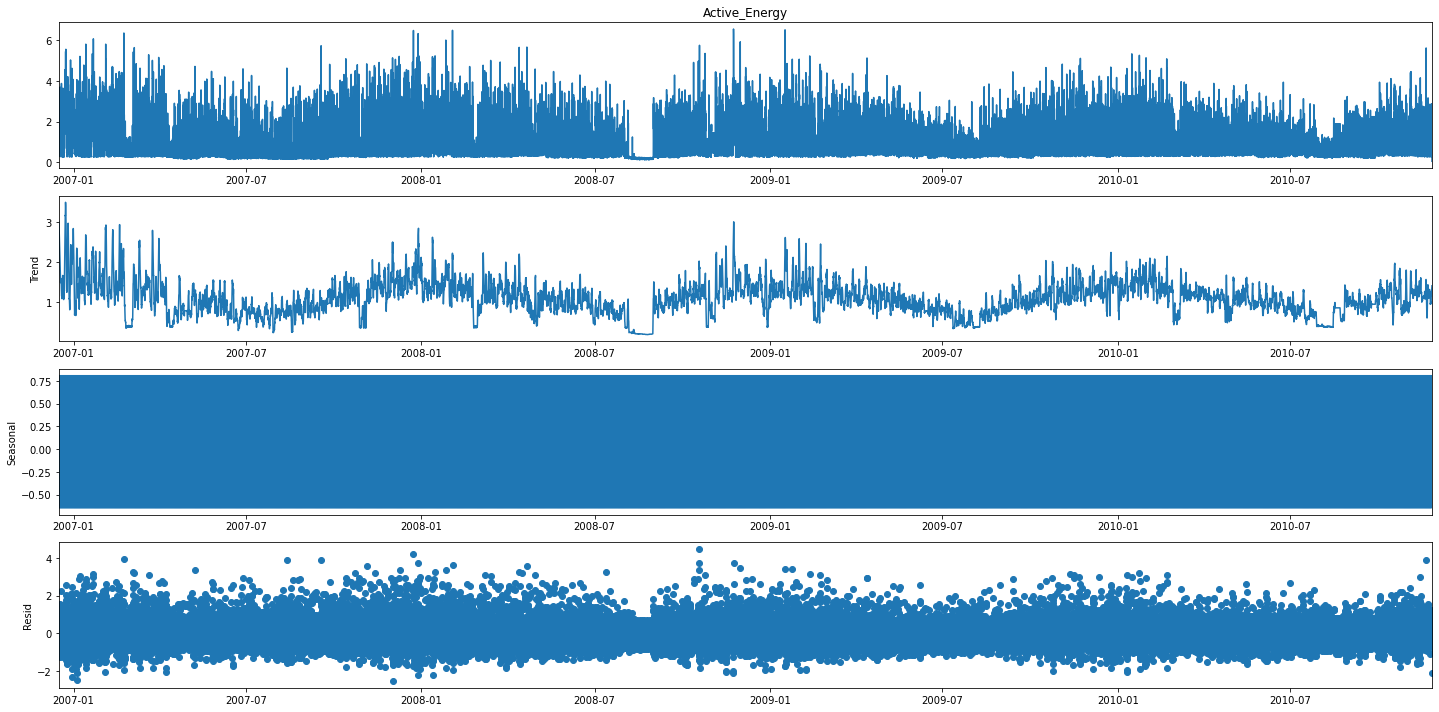

In [59]:
a_decomposition = seasonal_decompose(power_consumption['Active_Energy'], model='additive',freq=24, extrapolate_trend='freq')
decomposition.plot()
pyplot.show()

<ipython-input-60-b9e6af3d04b6>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  m_decomposition = seasonal_decompose(power_consumption['Active_Energy'], model='additive',freq=24, extrapolate_trend='freq')


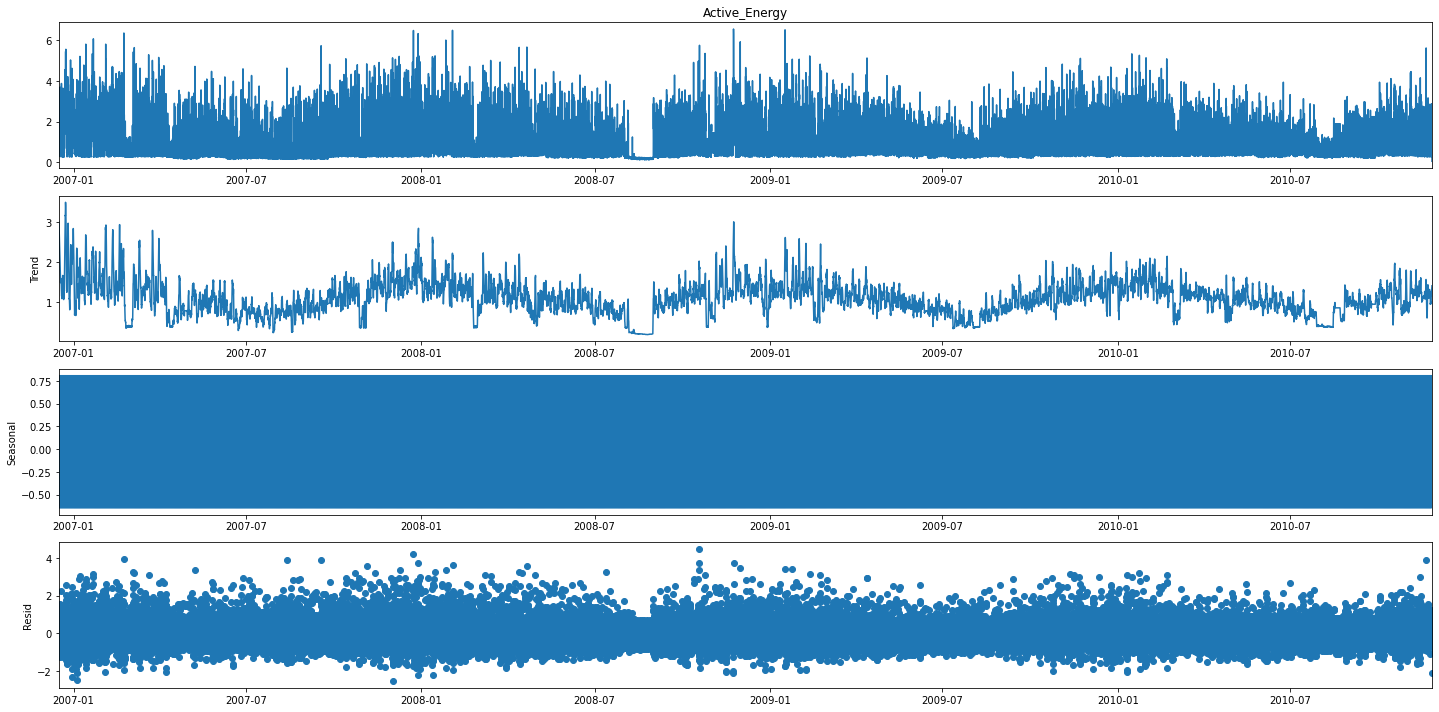

In [60]:
m_decomposition = seasonal_decompose(power_consumption['Active_Energy'], model='additive',freq=24, extrapolate_trend='freq')
decomposition.plot()
pyplot.show()

In [63]:
trend=a_decomposition.trend
seasonal=a_decomposition.seasonal
residual=a_decomposition.resid

<AxesSubplot:xlabel='datetime'>

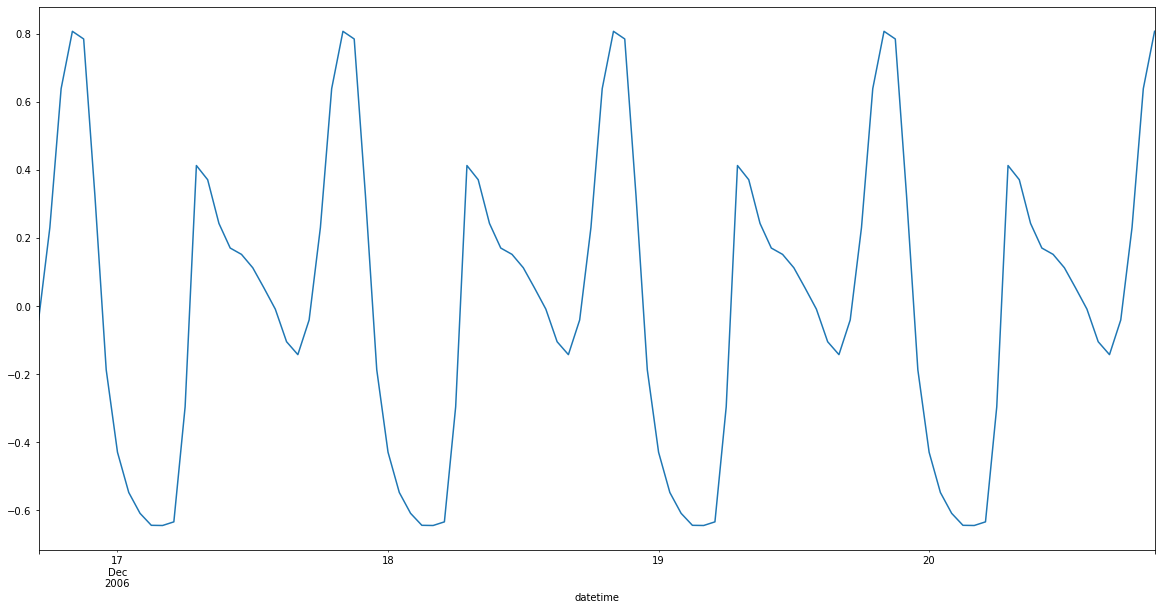

In [64]:
cut=100
part_of_seasonal=seasonal[:cut]
part_of_seasonal.plot()

In [65]:
daily_pattern=seasonal+residual
yearly_pattern=trend

<AxesSubplot:xlabel='datetime'>

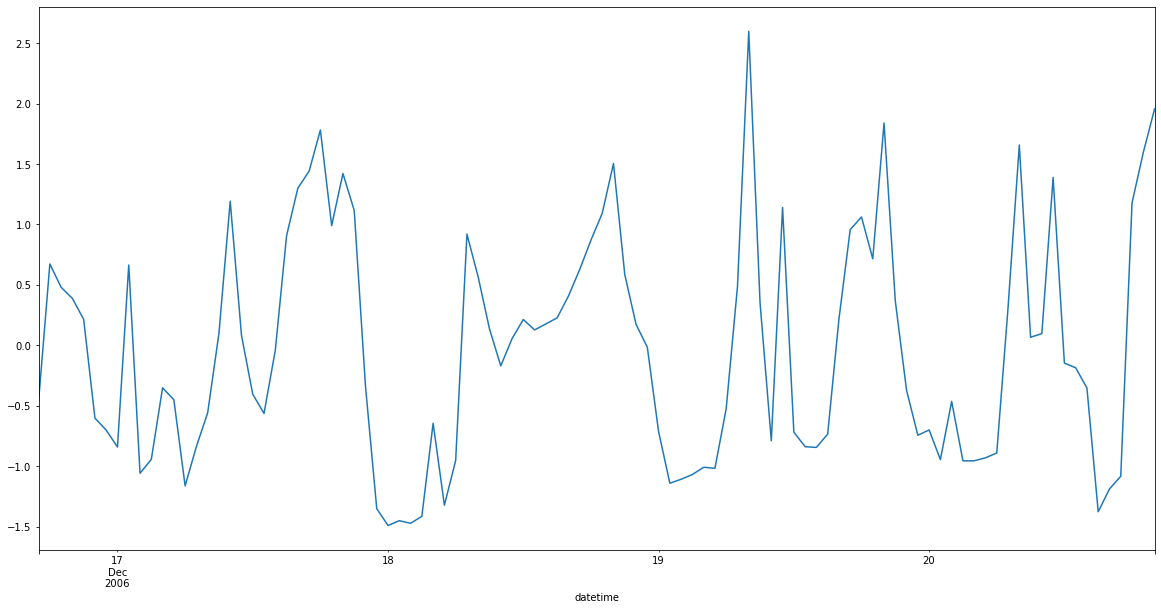

In [68]:
cut=100
part_of_daily_pattern=daily_pattern[:cut]
part_of_daily_pattern.plot()

# Model Building
Now, we will model our model.
First, we will try to model the trend as a fast fourier transform to capture the year seasonality.
Second, we will try to model daily_pattern using a sarima model, to capture the daily seasonality.

# Fast Fourier Transform

We will use the first three years for training, and the rest will be for testing

In [86]:
cut=3*24*365
train_fft=yearly_pattern[:cut]
fourier=fft.fft(train_fft)
f=fft.fftfreq(10) 

[ 0.   0.1  0.2  0.3  0.4 -0.5 -0.4 -0.3 -0.2 -0.1]
